# Machine Learning
## Lab 05 | Logistic Regression
This is the codesheet for lab assignment dated September 28, 2020.  The task is to work with Logistic Regression. 

In [29]:
import pandas as pd 
import numpy as np
import random
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

Text(0, 0.5, 'x2')

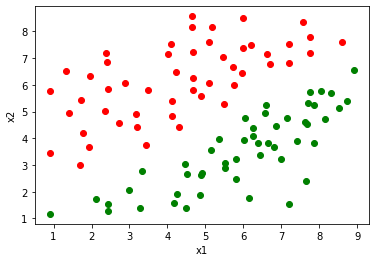

In [30]:
df = pd.read_csv('data1.csv')
X = np.array(df['x1'] + df['x2'])
y = np.array(df['y'])
plt.scatter(df[y == 0]['x1'], df[y == 0]['x2'], label = 'Class1', c='red')
plt.scatter(df[y == 1]['x1'], df[y == 1]['x2'], label = 'Class2', c='green')
plt.xlabel('x1')
plt.ylabel('x2')

Text(0, 0.5, 'y')

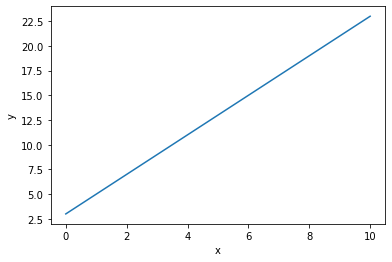

In [31]:
x = np.linspace(0, 10, 100)
plt.plot(x, 2*x+3, linestyle='-')
plt.xlabel('x')
plt.ylabel('y')

In [32]:
def sigmoid(z):
    if z.all() < 0 :
        return np.exp(z)/(1 + np.exp(z))
    else:
        return 1 / (1 + np.exp(-z))

In [34]:
V = np.random.randint(-1000, 1000, size=10)
V1 = sigmoid(V)
V1


<ipython-input-32-4a3299716a05>:5: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-z))


array([1.00000000e+000, 3.87399763e-021, 0.00000000e+000, 2.63026133e-142,
       0.00000000e+000, 1.00000000e+000, 1.00000000e+000, 1.00000000e+000,
       1.00000000e+000, 1.00000000e+000])

In [37]:
def hypothesis(theta, X):
    if sigmoid(np.dot(theta, X)) > 0.5:
        print(0)
    else:
        print(1)

In [36]:
def cost(theta, X, y):
    return(-y * np.log(hypothesis(theta, X)) - (1-y) * np.log(1-hypothesis(theta, X))).mean()

## Part B) Implementation of logistic regression

### 6. Implement Gradient descent algorithm for logistic regression

In [38]:
from pandas import read_csv
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

dataset_url = "https://raw.githubusercontent.com/sayoojsamuel/MachineLearning/master/labs/lab-05/loan_data.csv"

data = read_csv(dataset_url)
data.head(5)


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


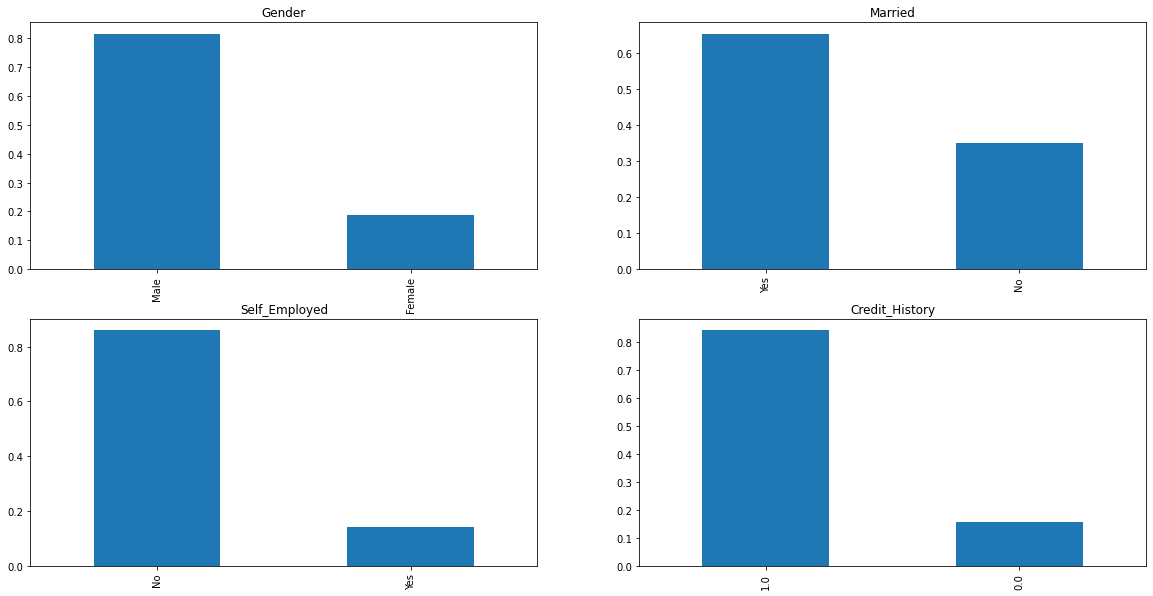

In [39]:
data_backup = data.copy()
train = data
train['Loan_Status'].value_counts()
train['Loan_Status'].value_counts(normalize=True)
train['Loan_Status'].value_counts().plot.bar()
plt.figure(1)
plt.subplot(221) 
train['Gender'].value_counts(normalize=True).plot.bar(figsize=(20,10),title='Gender')
plt.subplot(222)
train['Married'].value_counts(normalize=True).plot.bar(title='Married')
plt.subplot(223)
train['Self_Employed'].value_counts(normalize=True).plot.bar(title='Self_Employed')
plt.subplot(224)
train['Credit_History'].value_counts(normalize=True).plot.bar(title='Credit_History')
plt.show()

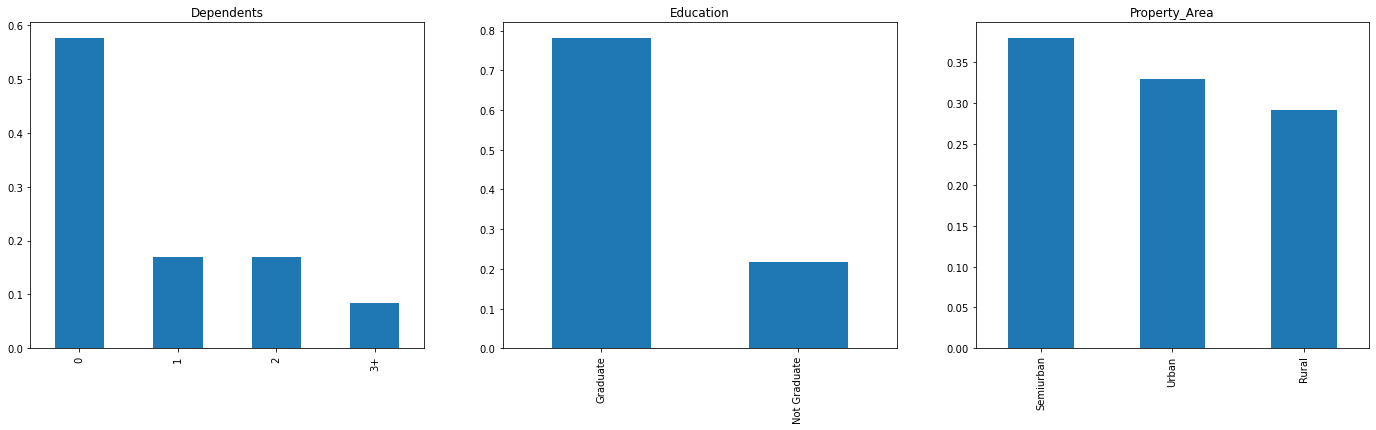

In [40]:
plt.figure(1)
plt.subplot(131) 
train['Dependents'].value_counts(normalize=True).plot.bar(figsize=(24,6), title= 'Dependents') 
plt.subplot(132) 
train['Education'].value_counts(normalize=True).plot.bar(title= 'Education') 
plt.subplot(133) 
train['Property_Area'].value_counts(normalize=True).plot.bar(title= 'Property_Area') 
plt.show()

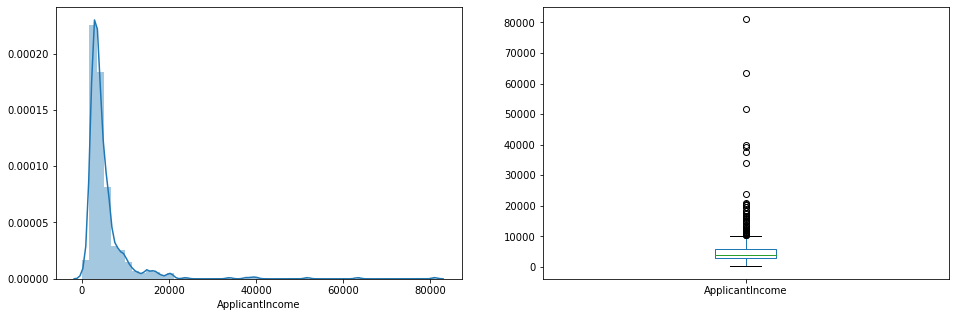

In [41]:
plt.figure(1) 
plt.subplot(121) 
sns.distplot(train['ApplicantIncome']); 
plt.subplot(122) 
train['ApplicantIncome'].plot.box(figsize=(16,5)) 
plt.show()

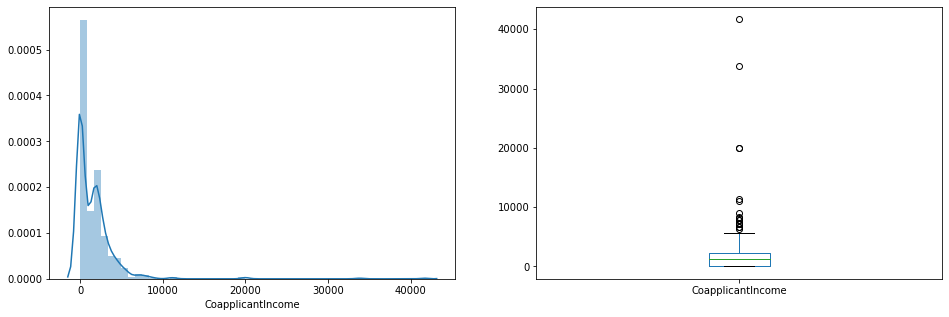

In [42]:
plt.figure(1) 
plt.subplot(121) 
sns.distplot(train['CoapplicantIncome']); 
plt.subplot(122) 
train['CoapplicantIncome'].plot.box(figsize=(16,5)) 
plt.show()

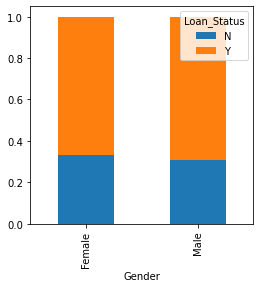

In [43]:
Gender=pd.crosstab(train['Gender'],train['Loan_Status']) 
Gender.div(Gender.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(4,4))


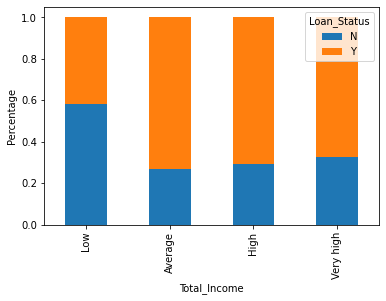

In [45]:
train['Total_Income']=train['ApplicantIncome']+train['CoapplicantIncome']
bins=[0,2500,4000,6000,81000] 
group=['Low','Average','High', 'Very high'] 
train['Total_Income_bin']=pd.cut(train['Total_Income'],bins,labels=group)
Total_Income_bin=pd.crosstab(train['Total_Income_bin'],train['Loan_Status']) 
Total_Income_bin.div(Total_Income_bin.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True) 
plt.xlabel('Total_Income') 
P = plt.ylabel('Percentage')

#### Drop rows with missing data instead of treating them properly. 
dataset not eligible for missing value treatment. 

In [46]:
df = train.dropna()

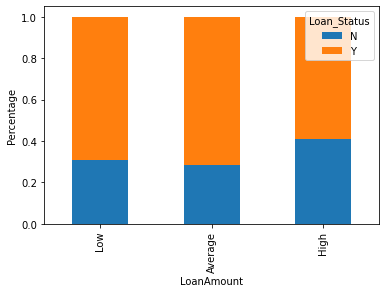

In [47]:
bins=[0,100,200,700] 
group=['Low','Average','High'] 
train['LoanAmount_bin']=pd.cut(df['LoanAmount'],bins,labels=group)
LoanAmount_bin=pd.crosstab(train['LoanAmount_bin'],train['Loan_Status']) 
LoanAmount_bin.div(LoanAmount_bin.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True) 
plt.xlabel('LoanAmount') 
P = plt.ylabel('Percentage')

In [18]:
#### Clear out the feature matrix

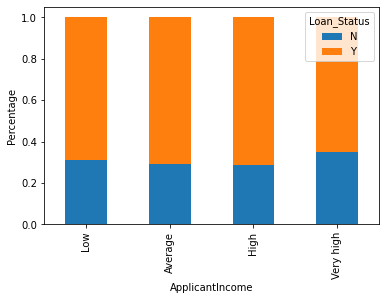

In [48]:
bins=[0,2500,4000,6000,81000] 
group=['Low','Average','High', 'Very high'] 
train['Income_bin']=pd.cut(df['ApplicantIncome'],bins,labels=group)
Income_bin=pd.crosstab(train['Income_bin'],train['Loan_Status']) 
Income_bin.div(Income_bin.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True) 
plt.xlabel('ApplicantIncome') 
P = plt.ylabel('Percentage')

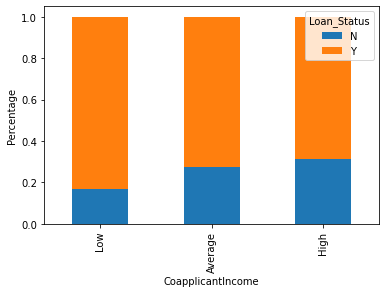

In [49]:
bins=[0,1000,3000,42000] 
group=['Low','Average','High'] 
train['Coapplicant_Income_bin']=pd.cut(df['CoapplicantIncome'],bins,labels=group)
Coapplicant_Income_bin=pd.crosstab(train['Coapplicant_Income_bin'],train['Loan_Status']) 
Coapplicant_Income_bin.div(Coapplicant_Income_bin.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True) 
plt.xlabel('CoapplicantIncome') 
P = plt.ylabel('Percentage')

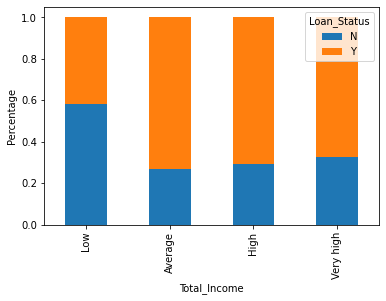

In [50]:
train.head()
train['Total_Income']=train['ApplicantIncome']+train['CoapplicantIncome']
bins=[0,2500,4000,6000,81000] 
group=['Low','Average','High', 'Very high'] 
train['Total_Income_bin']=pd.cut(train['Total_Income'],bins,labels=group)
Total_Income_bin=pd.crosstab(train['Total_Income_bin'],train['Loan_Status']) 
Total_Income_bin.div(Total_Income_bin.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True) 
plt.xlabel('Total_Income') 
P = plt.ylabel('Percentage')

In [51]:
train=train.drop(['Income_bin', 'Coapplicant_Income_bin', 'LoanAmount_bin', 'Total_Income_bin', 'Total_Income'], axis=1)
train['Dependents'].replace('3+', 3,inplace=True) 
#test['Dependents'].replace('3+', 3,inplace=True) 
train['Loan_Status'].replace('N', 0,inplace=True) 
train['Loan_Status'].replace('Y', 1,inplace=True)

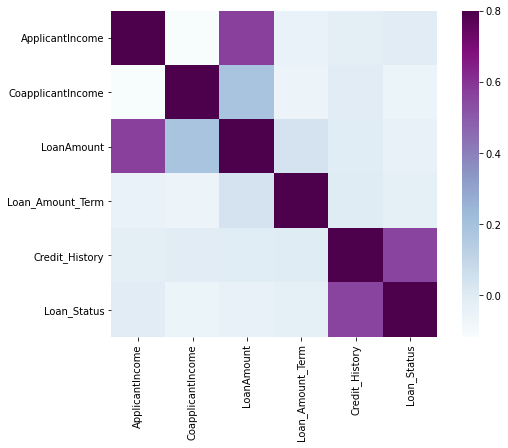

In [52]:
matrix = train.corr() 
f, ax = plt.subplots(figsize=(9, 6)) 
sns.heatmap(matrix, vmax=.8, square=True, cmap="BuPu");

In [53]:
train.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

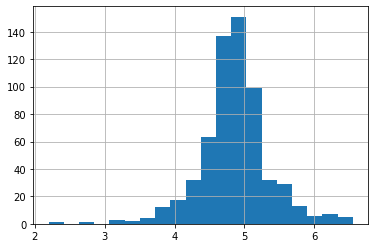

In [54]:
train['Gender'].fillna(train['Gender'].mode()[0], inplace=True) 
train['Married'].fillna(train['Married'].mode()[0], inplace=True) 
train['Dependents'].fillna(train['Dependents'].mode()[0], inplace=True) 
train['Self_Employed'].fillna(train['Self_Employed'].mode()[0], inplace=True) 
train['Credit_History'].fillna(train['Credit_History'].mode()[0], inplace=True)
train['Loan_Amount_Term'].value_counts()
train['Loan_Amount_Term'].fillna(train['Loan_Amount_Term'].mode()[0], inplace=True)
train['LoanAmount'].fillna(train['LoanAmount'].median(), inplace=True)
train.isnull().sum()

train['LoanAmount_log'] = np.log(train['LoanAmount']) 
train['LoanAmount_log'].hist(bins=20) 


In [55]:
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,LoanAmount_log
0,LP001002,Male,No,0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,1,4.852030
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,0,4.852030
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,1,4.189655
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,1,4.787492
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,1,4.948760


In [56]:
#train=train.drop('Loan_ID',axis=1) 
X = train.drop('Loan_Status', 1)
X = X.drop('Property_Area', 1)
X = pd.get_dummies(X)
y = train.Loan_Status


In [57]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, stratify=y, random_state=0)

### The Sigmoid Function


In [21]:
def sigmoidf(x):
  return 1 / (1 + np.exp(-x))

In [22]:
def cost(X, y, theta):
  m = len(y)
  h = sigmoidf(np.matmul(X, theta))
  cost = (1/m)*(np.matmul((-y), np.log(h))-np.matmul((1-y) , np.log(1-h)))
  return cost

In [23]:
def gradient_descent(X, y, params, alpha, iterations=1500):
    """
    @param alpha: The learning rate for the gradient_descent algorith,
    """
    m = len(y)
    cost_history = np.zeros((iterations,1))

    for i in range(iterations):
        params = params - (alpha/m) * np.matmul(X , (sigmoidf(np.matmul(X,params) - y))) 
        cost_history[i] = compute_cost(X, y, params)

    return (cost_history, params)

In [24]:
X.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,LoanAmount_log,Loan_ID_LP001002,Loan_ID_LP001003,Loan_ID_LP001005,Loan_ID_LP001006,...,Married_No,Married_Yes,Dependents_3,Dependents_0,Dependents_1,Dependents_2,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes
0,5849,0.0,128.0,360.0,1.0,4.852030,1,0,0,0,...,1,0,0,1,0,0,1,0,1,0
1,4583,1508.0,128.0,360.0,1.0,4.852030,0,1,0,0,...,0,1,0,0,1,0,1,0,1,0
2,3000,0.0,66.0,360.0,1.0,4.189655,0,0,1,0,...,0,1,0,1,0,0,1,0,0,1
3,2583,2358.0,120.0,360.0,1.0,4.787492,0,0,0,1,...,0,1,0,1,0,0,0,1,1,0
4,6000,0.0,141.0,360.0,1.0,4.948760,0,0,0,0,...,1,0,0,1,0,0,1,0,1,0


In [25]:
m = len(y_train)
X_train = np.hstack((np.ones((m,1)), X_train))
n = np.size(X_train, 1)
params = np.zeros((n,1))


learning_rate = 0.03
initial_cost = cost(X_train, y_train, params)
print("Cost: ", initial_cost)

(cost_history, params_optimal) = gradient_descent(X_train, y_train, params, learning_rate)
print("parameters: ", params_optimal)


Cost:  [0.69314718]


Exception: Data must be 1-dimensional

In [72]:
X_train

array([[1.0, 'Male', 'Yes', ..., 360.0, 1.0, 4.6913478822291435],
       [1.0, 'Male', 'No', ..., 360.0, 1.0, 5.69035945432406],
       [1.0, 'Male', 'Yes', ..., 360.0, 1.0, 4.852030263919617],
       ...,
       [1.0, 'Male', 'Yes', ..., 360.0, 0.0, 5.552959584921617],
       [1.0, 'Female', 'No', ..., 180.0, 1.0, 4.7535901911063645],
       [1.0, 'Male', 'Yes', ..., 12.0, 1.0, 4.709530201312334]],
      dtype=object)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,LoanAmount_log
0,Male,No,0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,4.852030
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,4.852030
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,4.189655
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,4.787492
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,4.948760


## PART C: Performance Evaluation of the classifier


In [28]:
from sklearn.linear_model import LogisticRegression 
from sklearn.metrics import accuracy_score
model = LogisticRegression() 
model.fit(X_train, y_train)
LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1, penalty='l2', random_state=1, solver='liblinear', tol=0.0001,verbose=0, warm_start=False)
y_pred = model.predict(X_test)

print("Accuracy Score: ",  accuracy_score(y_test,y_pred))
print("\n\n")

D:\programs\an3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


ValueError: X has 632 features per sample; expecting 633

In [27]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, y_pred)

NameError: name 'y_pred' is not defined

In [104]:
from sklearn.metrics import classification_report
y_true2 = [0, 1, 2, 2, 2]
y_pred2 = [0, 0, 2, 2, 1]
target_names = ['class 0', 'class 1', 'class 2']
print(classification_report(y_true2, y_pred2, target_names=target_names))

              precision    recall  f1-score   support

     class 0       0.50      1.00      0.67         1
     class 1       0.00      0.00      0.00         1
     class 2       1.00      0.67      0.80         3

    accuracy                           0.60         5
   macro avg       0.50      0.56      0.49         5
weighted avg       0.70      0.60      0.61         5



In [112]:
import numpy as np
from sklearn import metrics
#y = np.array([1, 1, 2, 2])
scores = np.array([0.1, 0.4, 0.35, 0.8])
fpr, tpr, thresholds = metrics.roc_curve(y.loc[1:], scores, pos_label=2)

ValueError: ignored

In [109]:
type(y)

pandas.core.series.Series